In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [37]:
data = pd.read_csv("DataSets.csv")
print("Data Frame shape : " , data.shape)
data.head()

Data Frame shape :  (665, 9)


,Transaction,Toko,date_time,Item,Harga / Unit,Quantity,Total Biaya,weekday_weekend,period_day
0,1,Solo Paragon,29-04-2023 14:34,GUAVA,6626.51,10,66265.1,weekend,Afternoon
1,1,Solo Paragon,29-04-2023 14:34,GUAVA,12048.20,30,361446.0,weekend,Afternoon
2,1,Solo Paragon,29-04-2023 14:34,LOCAL RED DRAGON,22289.16,50,1114458.0,weekend,Afternoon
3,1,Solo Paragon,29-04-2023 14:34,SEMANGKA MERAH,12048.20,200,2409640.0,weekend,Afternoon
4,1,Solo Paragon,29-04-2023 14:34,CALIFORNIAN PAPAYA,7228.92,70,506024.4,weekend,Afternoon


In [38]:
data['date_time'] = pd.to_datetime(data['date_time'] , format= "%d-%m-%Y %H:%M" )

In [39]:
data['date_time'].dtype

dtype('<M8[ns]')

In [40]:
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.weekday
data['hour'] = data['date_time'].dt.hour

In [41]:
data.head()

,Transaction,Toko,date_time,Item,Harga / Unit,Quantity,Total Biaya,weekday_weekend,period_day,month,day,hour
0,1,Solo Paragon,2023-04-29 14:34:00,GUAVA,6626.51,10,66265.1,weekend,Afternoon,4,5,14
1,1,Solo Paragon,2023-04-29 14:34:00,GUAVA,12048.20,30,361446.0,weekend,Afternoon,4,5,14
2,1,Solo Paragon,2023-04-29 14:34:00,LOCAL RED DRAGON,22289.16,50,1114458.0,weekend,Afternoon,4,5,14
3,1,Solo Paragon,2023-04-29 14:34:00,SEMANGKA MERAH,12048.20,200,2409640.0,weekend,Afternoon,4,5,14
4,1,Solo Paragon,2023-04-29 14:34:00,CALIFORNIAN PAPAYA,7228.92,70,506024.4,weekend,Afternoon,4,5,14


Text(0.5, 1.0, '10 Sayur paling laris')

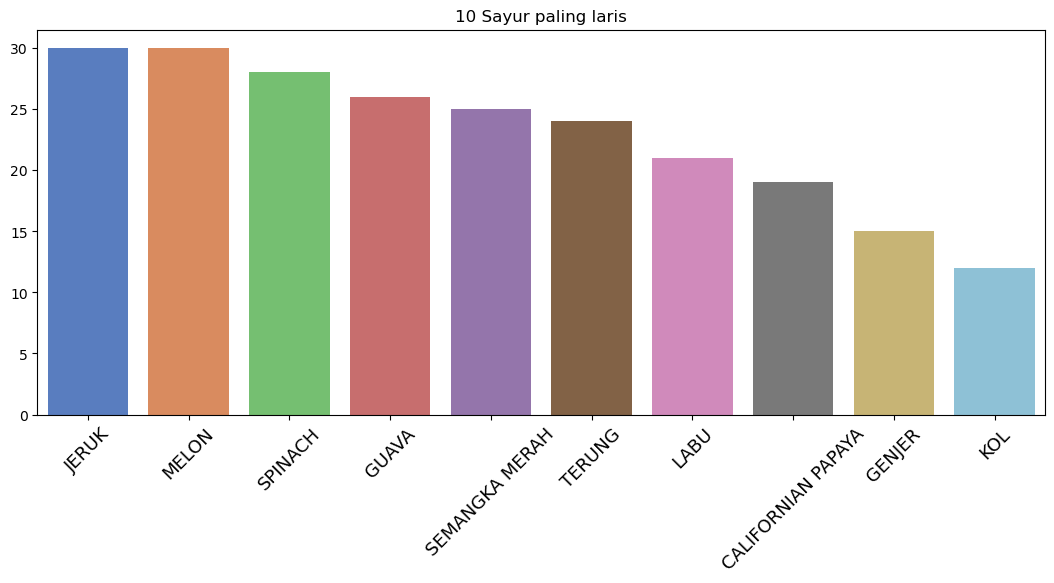

In [42]:
plt.figure(figsize=(13,5))
sns.set_palette('muted')

sns.barplot(x = data["Item"].value_counts()[:10].index,
               y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size=13 , rotation = 45)
plt.title("10 Sayur paling laris")

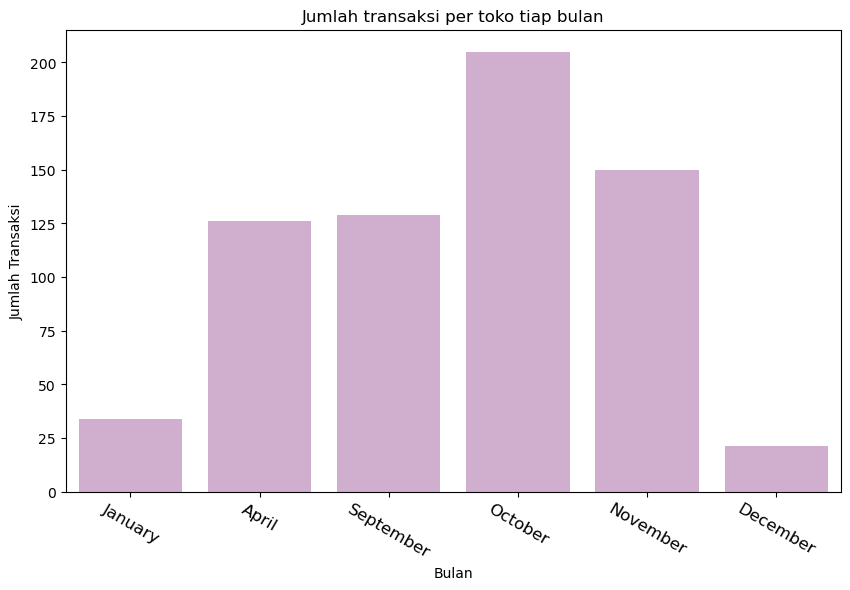

In [43]:
# transaksi tiap bulan
import calendar 
data_perbulan = data.groupby('month')['Transaction'].count()
plt.figure(figsize=(10, 6))
sns.barplot(
    x= [calendar.month_name[i] for i in data_perbulan.index],
    y=data_perbulan.values,
    color="#D5AAD3"
)
plt.xticks(rotation= -30 , size = 12)
plt.title("Jumlah transaksi per toko tiap bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.show()

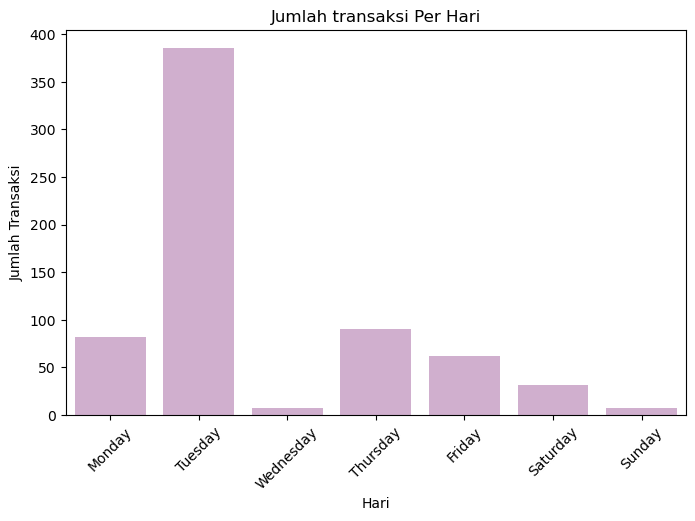

In [44]:
import calendar 
data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=[calendar.day_name[i] for i in data_perday.index],
    y=data_perday.values ,
    color="#D5AAD3"
)
plt.xticks(rotation=45)
plt.title("Jumlah transaksi Per Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")

plt.show()

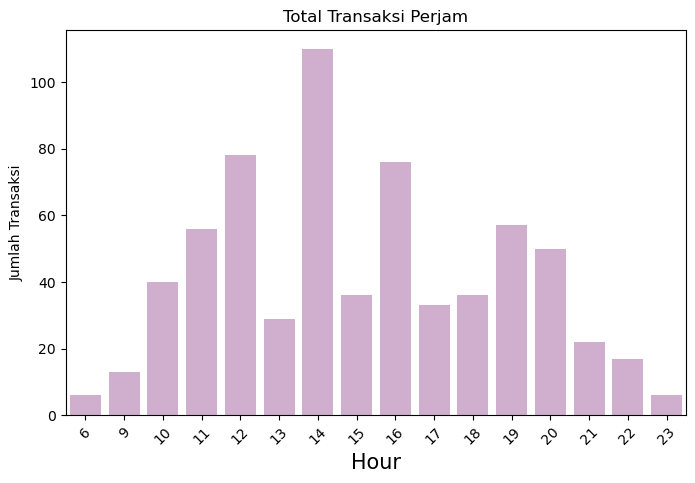

In [45]:
# pembelian tiap jam
data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=data_perhour.index ,
    y=data_perhour.values ,
    color="#D5AAD3"
)
plt.xticks(rotation=45)
plt.title("Total Transaksi Perjam")
plt.xlabel("Hour" , size = 15)
plt.ylabel("Jumlah Transaksi")

plt.show()

## Data Preparation

In [46]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [47]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [48]:
data = data[["Transaction" , "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,guava
1,1,guava
2,1,local red dragon
3,1,semangka merah
4,1,californian papaya
5,2,jeruk
6,2,guava
7,2,guava
8,2,local red dragon
9,2,semangka merah


In [49]:
from mlxtend.frequent_patterns import association_rules , apriori

In [50]:
item_count = data.groupby(["Transaction" , "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,californian papaya,1
1,1,guava,2
2,1,local red dragon,1
3,1,semangka merah,1
4,2,californian papaya,1
5,2,guava,2
6,2,jeruk,1
7,2,local red dragon,1
8,2,semangka merah,1
9,3,californian papaya,1


In [51]:
item_count_pivot = item_count.pivot_table(index="Transaction" ,columns="Item" , values='Count' , aggfunc='sum').fillna(0)
print("Ukuran Dataset : " , item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset :  (116, 94)


Item,aloe vera,alpukat mentega,apel malang curah 7/9,asparagus green,bayam,beetroot,blewah,brokoli,buncis,cabe,...,temukunci,temulawak,terong belanda,terung,timun,toge kecambah,tomat,unskin petai,wortel,zuccini
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,aloe vera,alpukat mentega,apel malang curah 7/9,asparagus green,bayam,beetroot,blewah,brokoli,buncis,cabe,...,temukunci,temulawak,terong belanda,terung,timun,toge kecambah,tomat,unskin petai,wortel,zuccini
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

basket_encode = item_count_pivot.applymap(hot_encode)
basket_sayur = basket_encode

basket_sayur.head()

Item,aloe vera,alpukat mentega,apel malang curah 7/9,asparagus green,bayam,beetroot,blewah,brokoli,buncis,cabe,...,temukunci,temulawak,terong belanda,terung,timun,toge kecambah,tomat,unskin petai,wortel,zuccini
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
print("Ukuran Dataset : " , basket_sayur.shape)
print("Jumlah Transaksi : " , basket_sayur.shape[0])
print("Jumlah Barang : " , basket_sayur.shape[1])

Ukuran Dataset :  (116, 94)
Jumlah Transaksi :  116
Jumlah Barang :  94


In [55]:
support = 0.01
frequent_itemsets = apriori(basket_sayur , min_support = support , use_colnames=True)
frequent_itemsets.sort_values("support" , ascending=False ).head(10)

c:\Users\USER\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
33,0.241379,(jeruk)
73,0.181034,(semangka merah)
41,0.163793,(labu)
9,0.155172,(californian papaya)
28,0.146552,(guava)
54,0.137931,(melon)
76,0.129310,(spinach)
78,0.120690,(terung)
157,0.120690,"(semangka merah, californian papaya)"
328,0.120690,"(semangka merah, melon)"


In [56]:
metric = "lift"
rules = association_rules(frequent_itemsets , metric=metric , min_threshold=1)[["antecedents" , "consequents" , "support" , "confidence" , "lift"]]
rules.sort_values('confidence',ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
3121,"(oyong, zuccini)","(terung, pare)",0.017241,1.0,11.600000
627,"(semangka merah, alpukat mentega)",(melon),0.017241,1.0,7.250000
3239,"(guava, mango, blewah)","(semangka merah, jeruk)",0.034483,1.0,10.545455
615,"(alpukat mentega, melon)",(guava),0.017241,1.0,6.823529
1259,(daun ketumbar),"(kol, okra)",0.017241,1.0,29.000000
3235,"(semangka merah, mango, jeruk, blewah)",(guava),0.034483,1.0,6.823529
3234,"(guava, mango, jeruk, blewah)",(semangka merah),0.034483,1.0,5.523810
621,"(semangka merah, alpukat mentega)",(guava),0.017241,1.0,6.823529
3233,"(guava, semangka merah, mango, blewah)",(jeruk),0.034483,1.0,4.142857
3232,"(guava, semangka merah, jeruk, blewah)",(mango),0.034483,1.0,14.500000
